<a href="https://colab.research.google.com/github/Fefeupz/data_analysis/blob/main/msft_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.10.0 requires websockets<15.1.0,>=13.0.0, but you have websockets 10.4 which is incompatible.


In [ ]:
import yfinance as yf
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [ ]:
stock = 'MSFT'
msft = yf.Ticker(stock)

In [ ]:
msft.basic_info['dayHigh']

/usr/local/lib/python3.11/dist-packages/yfinance/base.py:254: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


391.8900146484375

In [ ]:
msft.get_financials().dropna()

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
TaxEffectOfUnusualItems,-99918000.0,-2850000.0,43754000.0,180160797.164637
TaxRateForCalcs,0.182,0.19,0.131,0.138266
NormalizedEBITDA,133558000000.0,105155000000.0,99905000000.0,83831000000.0
TotalUnusualItems,-549000000.0,-15000000.0,334000000.0,1303000000.0
TotalUnusualItemsExcludingGoodwill,-549000000.0,-15000000.0,334000000.0,1303000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,88136000000.0,72361000000.0,72738000000.0,61271000000.0
ReconciledDepreciation,22287000000.0,13861000000.0,14460000000.0,11686000000.0
ReconciledCostOfRevenue,74114000000.0,65863000000.0,62650000000.0,52232000000.0
EBITDA,133009000000.0,105140000000.0,100239000000.0,85134000000.0
EBIT,110722000000.0,91279000000.0,85779000000.0,73448000000.0


Text(0.5, 1.0, 'MSFT GrossProfit')

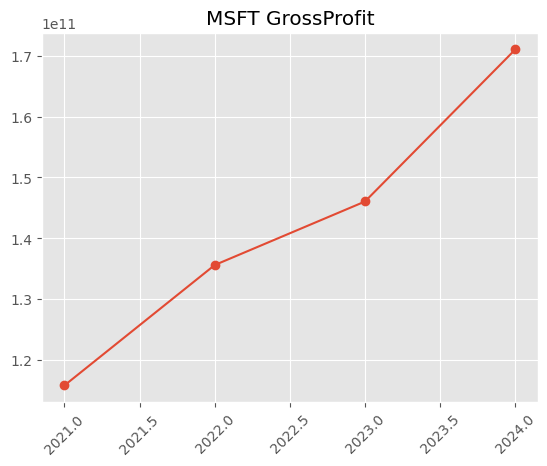

In [ ]:
plt.style.use('ggplot')
financials = msft.get_financials()
financials.columns = pd.to_datetime(financials.columns)
financials = financials[sorted(financials.columns)]
financials.columns = financials.columns.year
plt.plot(financials.loc["GrossProfit"].index, financials.loc['GrossProfit'].values, marker='o')
plt.xticks(rotation=45)
plt.title(f'{stock} GrossProfit')

Text(0.5, 1.0, 'MSFT EBITDA')

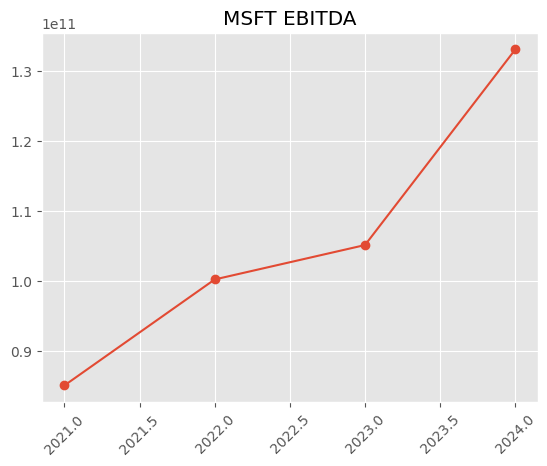

In [ ]:
plt.style.use('ggplot')
financials = msft.get_financials()
financials.columns = pd.to_datetime(financials.columns)
financials = financials[sorted(financials.columns)]
financials.columns = financials.columns.year
plt.plot(financials.loc["EBITDA"].index, financials.loc['EBITDA'].values, marker='o')
plt.xticks(rotation=45)
plt.title(f'{stock} EBITDA')

In [ ]:
financials = msft.get_financials()
revenue = financials.loc['CostOfRevenue':'TotalRevenue']
revenue.columns = pd.to_datetime(revenue.columns)
revenue = revenue[sorted(revenue.columns)]
revenue = revenue/100000000
revenue = revenue.T
revenue

,CostOfRevenue,TotalRevenue
2021-06-30,522.32,1680.88
2022-06-30,626.5,1982.7
2023-06-30,658.63,2119.15
2024-06-30,741.14,2451.22


<Figure size 1200x1000 with 0 Axes>

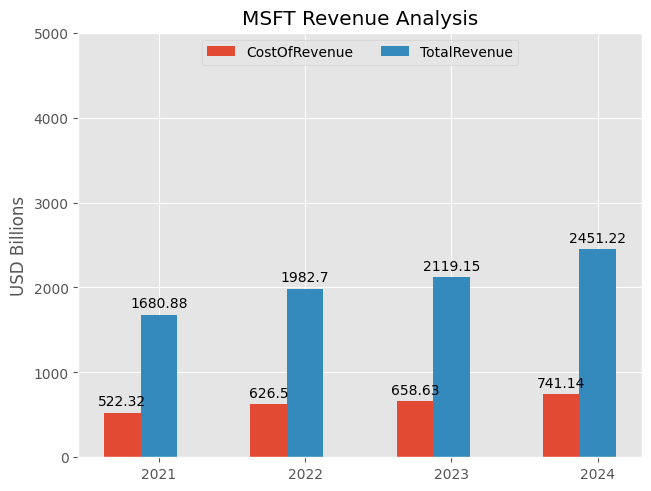

In [ ]:
plt.figure(figsize=(12,10))
x_values = [i.year for i in revenue.index]
data = revenue

x=np.arange(len(x_values))
width = 0.25
multipler = 0

fig, ax=plt.subplots(layout='constrained')

for attribute, meansurement in data.items():
  offset = width*multipler
  rects = ax.bar(x+offset, meansurement, width, label=attribute)
  ax.bar_label(rects, padding=3)
  multipler+=1

ax.set_ylabel("USD Billions")
ax.set_title(f'{stock} Revenue Analysis')
ax.set_xticks(x+width, x_values)
ax.legend(revenue.columns,loc=9, ncols=3)
ax.set_ylim(0,5000);

In [ ]:
mystocks = ['MSFT']
today = datetime.today()
today

datetime.datetime(2025, 4, 15, 17, 33, 2, 572548)

In [ ]:
p_df = yf.download(mystocks, start='2020-01-01', end=today)
p_df.head()

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.323242,153.428246,151.137280,151.566834,22622100
2020-01-03,151.414124,152.683705,150.879566,151.127764,21116200
2020-01-06,151.805496,151.872323,149.399972,149.944085,20813700
2020-01-07,150.421387,152.416438,150.173203,152.082346,21634100
2020-01-08,152.817337,153.495089,150.774555,151.710031,27746500


In [ ]:
p_df = p_df['Close'].copy()
p_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1329 entries, 2020-01-02 to 2025-04-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    1329 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [ ]:
p_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07',
               '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11',
               '2025-04-14', '2025-04-15'],
              dtype='datetime64[ns]', name='Date', length=1329, freq=None)

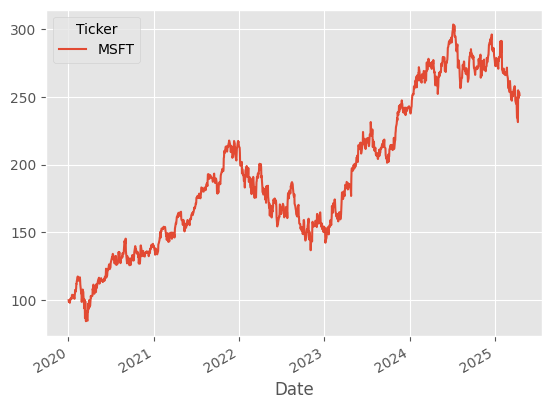

In [ ]:
norm_df = p_df/p_df.iloc[0]*100
norm_df.plot();

In [ ]:
norm_df.describe

<bound method NDFrame.describe of Ticker            MSFT
Date                  
2020-01-02  100.000000
2020-01-03   98.754841
2020-01-06   99.010101
2020-01-07   98.107361
2020-01-08   99.670040
...                ...
2025-04-09  254.684146
2025-04-10  248.722895
2025-04-11  253.353638
2025-04-14  252.936210
2025-04-15  251.168708

[1329 rows x 1 columns]>

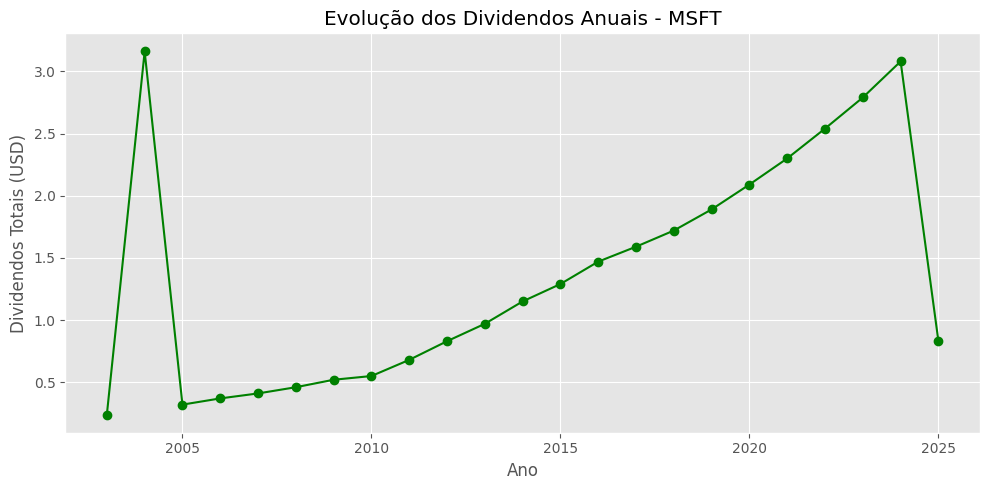

In [ ]:
# Histórico de dividendos
dividends = msft.dividends

# Verifica se há dividendos
if dividends.empty:
    print("Esse ativo não possui histórico de dividendos.")
else:
    # Agrupando os dividendos por ano
    dividends_by_year = dividends.groupby(dividends.index.year).sum()

    # Plotando o gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(dividends_by_year.index, dividends_by_year.values, marker='o', linestyle='-', color='green')
    plt.title(f'Evolução dos Dividendos Anuais - {stock}')
    plt.xlabel('Ano')
    plt.ylabel('Dividendos Totais (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()